# Telecom Churn

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATA_URL =   "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


overview dataset

In [4]:
# melihat data dimensi
df.shape

(3333, 20)

In [5]:
# melihat columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
# melihat info Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
# mengubah churn dari boolean ke int64
df['churn'] = df['Churn'].astype('int64')

In [8]:
# melihat statistik 
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
# melihat statistik pada fitur non-numerik
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [10]:
# melihat distribusi churn
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [11]:
# melihat dalam bentuk persen
df['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

# Sorting

In [12]:
# mengurutkan berdasarkan Total day charge
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,...,18.40,253.9,100,11.43,10.1,9,2.73,1,True,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,...,17.29,217.5,107,9.79,11.8,8,3.19,1,True,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,...,19.33,153.9,114,6.93,15.8,7,4.27,0,True,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,...,18.06,265.0,132,11.93,12.7,8,3.43,2,True,1


In [13]:
# mengurutkan berdasarkan Churn dan Total day charge
df.sort_values(by=['Churn', "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,...,17.76,260.1,123,11.70,12.1,3,3.27,3,False,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,...,12.55,192.7,97,8.67,10.1,7,2.73,3,False,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,...,5.65,246.5,99,11.09,9.2,10,2.48,4,False,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,...,17.03,183.5,105,8.26,14.2,2,3.83,1,False,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,...,21.06,152.9,103,6.88,7.4,3,2.00,1,False,0


# indexing and retrieving data

In [14]:
# melihat proporsi pengguna yang churned dalam dataframe kita adalah apa 
df['Churn'].mean()

0.14491449144914492

Apa adakah Berapa nilai rata-rata fitur numerik untuk pengguna yang churn?

In [15]:
# select_dtypes untuk memilih semua kolom
df.select_dtypes(include=np.number)[df["Churn"]==1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
churn                       1.000000
dtype: float64

Berapa banyak waktu (rata-rata) yang dihabiskan pengguna yang churn di telepon pada siang hari?

In [16]:
df[df['churn'] == 1]["Total day minutes"].mean()

206.91407867494823

Berapa lama maksimum panggilan internasional di antara pengguna setia (Churn == 0) yang tidak memiliki paket internasional?

In [17]:
df[(df['Churn'] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

# Menerapkan fungsi pada sel, kolom, dan baris

In [18]:
# menerapkan fungsi di setiap kolom
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
churn                         1
dtype: object

Metode apply juga dapat digunakan untuk menerapkan fungsi pada setiap baris. Untuk melakukannya, tentukan axis=1 . Fungsi lambda sangat praktis dalam skenario seperti ini. Misalnya, jika kita perlu memilih semua negara bagian yang dimulai dengan 'W', kita bisa melakukannya seperti ini:

In [19]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,...,16.24,182.7,115,8.22,9.5,3,2.57,0,False,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,...,19.19,265.3,86,11.94,3.5,3,0.95,1,False,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,...,18.46,70.6,79,3.18,11.0,3,2.97,1,False,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,...,18.67,203.9,127,9.18,9.7,3,2.62,5,True,1


Metode map dapat digunakan untuk mengganti nilai dalam kolom dengan memberikan kamus dalam bentuk {nilai_lama: nilai_baru} sebagai argumennya:

In [20]:
d = {'No': False, 'Yes': True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


Hampir hal yang sama bisa dilakukan dengan metode replace.

Perbedaan dalam mengatasi nilai yang tidak ada dalam dictionary peta

Ada perbedaan kecil. Metode `replace` tidak akan melakukan apa-apa pada nilai yang tidak ditemukan dalam kamus peta, sementara `map` akan mengubahnya menjadi NaN).


In [21]:
a_series = pd.Series(['a', 'b', 'c'])
a_series.replace({'a': 1, 'b': 1})     # 1, 2, c
a_series.map({'a': 1, 'b': 2})     # 1, 2, NaN

0    1.0
1    2.0
2    NaN
dtype: float64

In [22]:
df = df.replace({"Voice mail plan": d})
df.head()

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_22364\1212166602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Voice mail plan": d})


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


# Grouping

Secara umum, pengelompokan data di Pandas bekerja sebagai berikut:
df.groupby(by=grouping_columns)[columns_to_show].function()

- Pertama, metode groupby membagi grouping_columns dengan nilai-nilainya. Mereka menjadi indeks baru dalam dataframe yang dihasilkan.

- Lalu, kolom-kolom yang diinginkan dipilih ( columns_to_show ). Jika columns_to_show tidak termasuk, semua klausa non groupby akan dimasukkan.

- Akhirnya, satu atau beberapa fungsi diterapkan pada kelompok-kelompok yang diperoleh per kolom yang dipilih.

Berikut adalah contoh di mana kami mengelompokkan data berdasarkan nilai variabel Churn dan menampilkan statistik tiga kolom di setiap kelompok:

In [23]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

Ayo lakukan hal yang sama, tetapi sedikit berbeda dengan mengirimkan daftar fungsi ke agg() :

In [24]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg(["mean", "std", "min", "max"])

Total day minutes                        Total eve minutes             \
                   mean        std  min    max              mean        std   
Churn                                                                         
False        175.175754  50.181655  0.0  315.6        199.043298  50.292175   
True         206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
        min    max                mean        std   min    max  
Churn                                                           
False   0.0  361.8          200.133193  51.105032  23.2  395.0  
True   70.9  363.7          205.231677  47.132825  47.4  354.9

# Summary tables

Misalkan kita ingin melihat bagaimana pengamatan dalam dataset kita ditata dalam konteks dua variabel – Churn dan International plan . Untuk melakukannya, kita dapat membangun tabel ketergantungan menggunakan metode crosstab :

In [25]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
False,2664,186
True,346,137


In [26]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


Kita bisa melihat bahwa sebagian besar pengguna loyal dan tidak menggunakan layanan tambahan (Rencana Internasional/Pengiriman Suara).

Ini akan menyerupai tabel pivot bagi mereka yang familiar dengan Excel. Dan tentu saja, tabel pivot diimplementasikan dalam Pandas: metode pivot_table mengambil parameter berikut:

- values – daftar variabel untuk menghitung statistik,
- index – daftar variabel untuk mengelompokkan data,
- aggfunc – apa statistik yang perlu kita hitung untuk kelompok, misalnya jumlah, rata-rata, maksimum, minimum atau sesuatu lainnya.

Lihatlah jumlah rata-rata panggilan harian, sore, dan malam berdasarkan kode area:

In [27]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


# Transformasi Datagrame

Seperti banyak hal lain di Pandas, menambahkan kolom ke DataFrame dapat dilakukan dengan banyak cara.

Misalnya, jika ingin menghitung jumlah panggilan total untuk semua pengguna, mari kita buat Series total_calls dan tempatkankannya ke dalam DataFrame:

In [28]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,0,359


Bisa juga menambahkan kolom dengan lebih mudah tanpa membuat instance Series intermediate:

In [29]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,0,359,52.09


Untuk menghapus kolom atau baris, gunakan metode drop dengan mengirimkan indeks yang diperlukan dan parameter axis ( 1 jika Anda menghapus kolom, dan tidak apa-apa atau 0 jika Anda menghapus baris). Argument inplace menunjukkan apakah ingin mengubah DataFrame asli. Dengan inplace=False , metode drop tidak mengubah DataFrame yang ada dan mengembalikan DataFrame baru dengan baris atau kolom yang dihapus. Dengan inplace=True , ia mengubah DataFrame.

In [30]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,0


# Memprediksi telecom churn columns

Lihatlah bagaimana tingkat churn terkait dengan fitur rencana internasional. Kami akan melakukannya menggunakan crosstab tabel ketergantungan dan juga melalui analisis visual dengan Seaborn (namun, analisis visual akan dibahas lebih lanjut di topik berikutnya).

In [31]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


<Axes: xlabel='International plan', ylabel='count'>

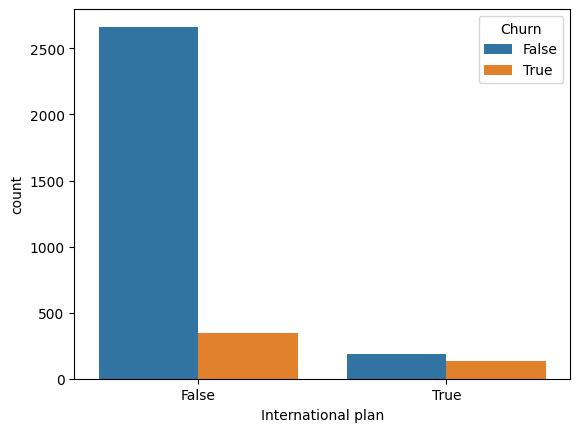

In [32]:
sns.countplot(x="International plan", hue="Churn", data=df)

Kami mengamati bahwa tingkat churn secara signifikan lebih tinggi pada Paket Internasional. Ini adalah temuan yang patut dicatat. Mungkin, biaya yang tinggi dan tidak dikelola dengan baik untuk panggilan internasional menyebabkan konflik dan mengakibatkan ketidakpuasan di antara pelanggan operator telekomunikasi.

Berikutnya, mari kita lihat fitur penting lainnya – Panggilan layanan pelanggan. Mari kita juga buat tabel ringkasan dan gambar.

In [33]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


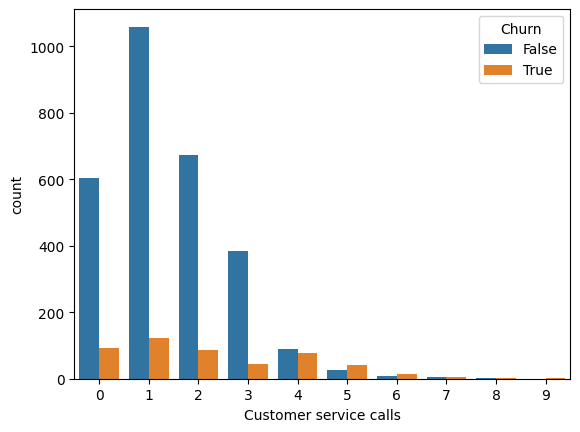

In [34]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Meskipun tidak terlihat jelas dari tabel ringkasan, dari plot di atas mudah untuk dilihat bahwa tingkat churn meningkat tajam dari 4 panggilan layanan pelanggan dan di atas.

Sekarang mari kita tambahkan fitur biner ke DataFrame kami – Customer service calls > 3 . Dan sekali lagi, mari kita lihat bagaimana hubungannya dengan churn.

In [35]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<Axes: xlabel='Many_service_calls', ylabel='count'>

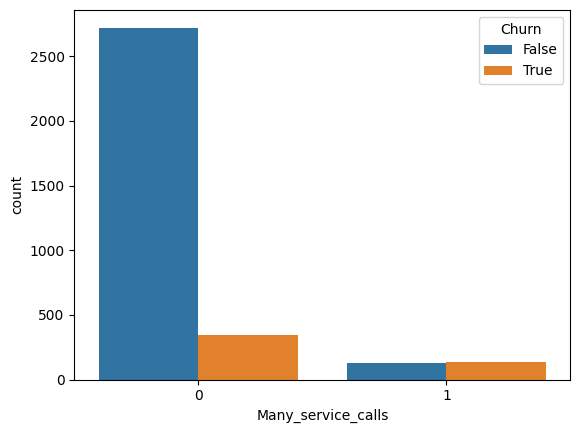

In [36]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df)

Mari kita buat tabel kontingensi lain yang menghubungkan Churn dengan paket Internasional dan fitur Many_service_calls yang baru saja dibuat.

In [37]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"], margins=True)

Churn,False,True,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


<Figure size 800x800 with 0 Axes>

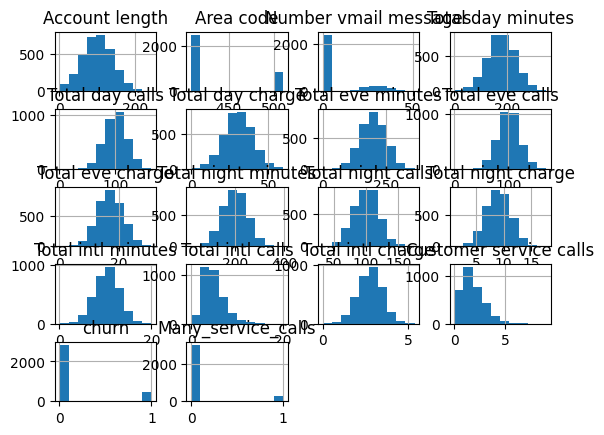

In [41]:
plt.figure(figsize=(8, 8))
df.hist();

Oleh karena itu, dengan memprediksi bahwa pelanggan tidak akan setia (Churn=1) jika mereka telah membuat lebih dari 3 panggilan ke pusat layanan AND telah menambahkan Rencana Internasional, dan memprediksi Churn=0 lainnya (dan “lainnya” di sini berarti negasi, yaitu Many_service_calls <= 3 ATAU Rencana Internasional tidak ditambahkan), kita berharap akurasi sebesar 85.8% (kami hanya akan salah 464 + 9 kali, lihat tabel ketergantungan di atas; dan ). Akurasi ini 85.8%, yang diperoleh melalui pemikiran yang sangat sederhana, menjadi titik awal yang bermanfaat (baseline) untuk pengembangan model machine learning di masa depan.

Seiring kita melanjutkan pelajaran ini, ingatlah bahwa, sebelum munculnya machine learning, proses analisis data tampak seperti ini. Mari kita ulas apa yang telah kita cover:

Bagian loyal clients dalam dataset adalah 85.5%. Model yang paling sederhana yang selalu memprediksi “customer loyal” pada data semacam ini akan benar dalam sekitar 85.5% dari semua kasus. Artinya, proporsi jawaban yang benar (akurasi) dari model berikutnya seharusnya tidak kurang dari angka ini, dan diharapkan jauh lebih tinggi;



Dengan bantuan prediksi sederhana yang dapat ditulis dalam rumus berikut: International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0 , kita dapat mengharapkan tingkat tebakan sebesar 85.8%, yang sedikit di atas 85.5%. Selanjutnya, kita akan membahas pohon keputusan dan memahami cara menemukan aturan semacam secara otomatis hanya berdasarkan data input;

Kita mendapatkan dua batas dasar ini tanpa menerapkan machine learning, dan mereka akan menjadi titik awal untuk model berikutnya. Jika ternyata dengan usaha yang sangat besar, kita hanya meningkatkan akurasi hanya 0.5%, misalnya, kemungkinan besar kita sedang melakukan sesuatu yang salah, dan cukup hanya menggunakan model sederhana “if-else” dengan dua kondisi;

Sebelum melatih model kompleks, disarankan untuk mengolah data sedikit, membuat beberapa plot, dan memeriksa asumsi sederhana. Selain itu, dalam aplikasi kebisnisan machine learning, mereka biasanya dimulai dengan solusi sederhana lalu eksperimen dengan yang lebih kompleks.